In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

In [3]:
data1 = pd.read_csv('data/winequality-red.csv', delimiter=";")
data1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data understanding and cleaning

In [15]:
#gives a good insight of the dataset
data1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
print(data1.shape)
data1.info()

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [17]:
#Find NaN if any using 2 different methods
print(np.where(pd.isnull(data1)))
print(data1.isnull().values.any()) 

(array([], dtype=int64), array([], dtype=int64))
False


In [14]:
#Looping through each column to find NaN if any
for col in data1.columns:
    for item, frame in data1[str(col)].iteritems(): #frame is each cell of a col 
        if not pd.notnull(frame):
            print(frame)

7.4
7.8
7.8
11.2
7.4
7.4
7.9
7.3
7.8
7.5
6.7
7.5
5.6
7.8
8.9
8.9
8.5
8.1
7.4
7.9
8.9
7.6
7.9
8.5
6.9
6.3
7.6
7.9
7.1
7.8
6.7
6.9
8.3
6.9
5.2
7.8
7.8
8.1
5.7
7.3
7.3
8.8
7.5
8.1
6.8
4.6
7.7
8.7
6.4
5.6
8.8
6.6
6.6
8.6
7.6
7.7
10.2
7.5
7.8
7.3
8.8
7.7
7.5
7.0
7.2
7.2
7.5
6.6
9.3
8.0
7.7
7.7
7.7
8.3
9.7
8.8
8.8
6.8
6.7
8.3
6.2
7.8
7.4
7.3
6.3
6.9
8.6
7.7
9.3
7.0
7.9
8.6
8.6
7.7
5.0
4.7
6.8
7.0
7.6
8.1
8.3
7.8
8.1
8.1
7.2
8.1
7.8
6.2
8.0
8.1
7.8
8.4
8.4
10.1
7.8
9.4
8.3
7.8
8.8
7.0
7.3
8.8
7.3
8.0
7.8
9.0
8.2
8.1
8.0
6.1
8.0
5.6
5.6
6.6
7.9
8.4
8.3
7.2
7.8
7.8
8.4
8.3
5.2
6.3
5.2
8.1
5.8
7.6
6.9
8.2
7.3
9.2
7.5
7.5
7.1
7.1
7.1
7.1
7.1
6.8
7.6
7.6
7.8
7.4
7.3
7.8
6.8
7.3
6.8
7.5
7.9
8.0
8.0
7.4
7.3
6.9
7.3
7.5
7.0
8.8
8.8
8.9
7.2
6.8
6.7
8.9
7.4
7.7
7.9
7.9
8.2
6.4
6.8
7.6
7.6
7.8
7.3
11.5
5.4
6.9
9.6
8.8
6.8
7.0
7.0
12.8
12.8
7.8
7.8
11.0
9.7
8.0
11.6
8.2
7.8
7.0
8.7
8.1
7.5
7.8
7.8
7.4
6.8
8.6
8.4
7.7
8.9
9.0
7.7
6.9
5.2
8.0
8.5
6.9
8.2
7.2
7.2
7.2
7.2
8.2
8.9
12.0
7.7
15.0
15.0
7.3
7.1
8

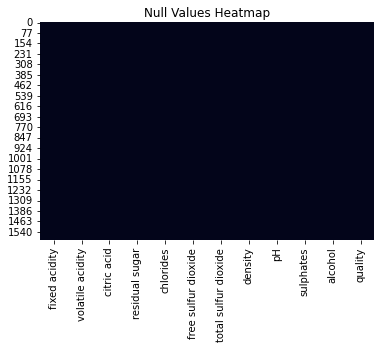

In [23]:
# Using seaborn heatmap to see null values heatmap
sns.heatmap(data1.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

# Insights
1- mean value of all columns is greater than zero which means no column is completely empty

2- dimension is (1599,12) and each column have 1599 non-null count so data has no empty cell

3- after several different types of test i am now sure that data is free of empty cells. Hurray!!

# Exploratory Analysis

We can do exploaratory analys by selecting a few columns as series and analyse it. Since all columns are numerical (float,int) so it's kind of hard for me to do analysis.

# Machine Learning